# Lead Scoring Assignment


## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

## Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Step1: Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


# Step2: Read and explore data

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step3: Data Cleaning

In [7]:
#find percentage of null values
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#drop columns with null values more than or equal to 40%
for i in df.columns:
    if df[i].isna().sum()*100/df.shape[0]>=40:
        df.drop(i,axis=1,inplace=True)

In [9]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Since Tags,City and Country are not relevant to the analysis
df.drop(['Tags','City','Country'],1,inplace=True)

In [11]:
#for total count of null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [12]:
#checking for 'select' value in columns
for i in df.columns:
    if 'Select' in df[i].value_counts():
        print(df[i].value_counts())

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources 

In [13]:
#Since there is high %age of select values in How did you hear about X Education, Lead Profile 
#we will be dropping these columns
df.drop(['How did you hear about X Education', 'Lead Profile'],1,inplace=True)

In [14]:
# Get the value counts of all the columns

for column in df:
    print(df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [15]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'],1,inplace=True)

In [16]:
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [17]:
#For all the remaining columns with null values since we have trimmed most of the data, we will be shredding the rows now
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [19]:
#now lets check the number of rows left
print(len(df.index)/9240)

0.6897186147186147


In [20]:
#We can also filter these columns out since they are irrelevant for the analysis
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

# Step4: Data Visualisation

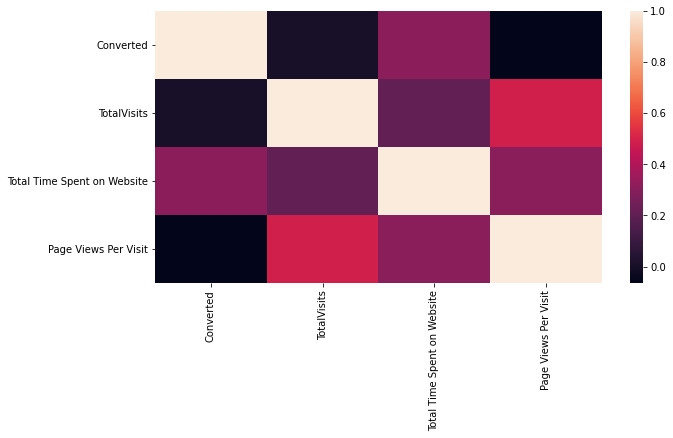

In [21]:
#Checking correlation between numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())
plt.show()

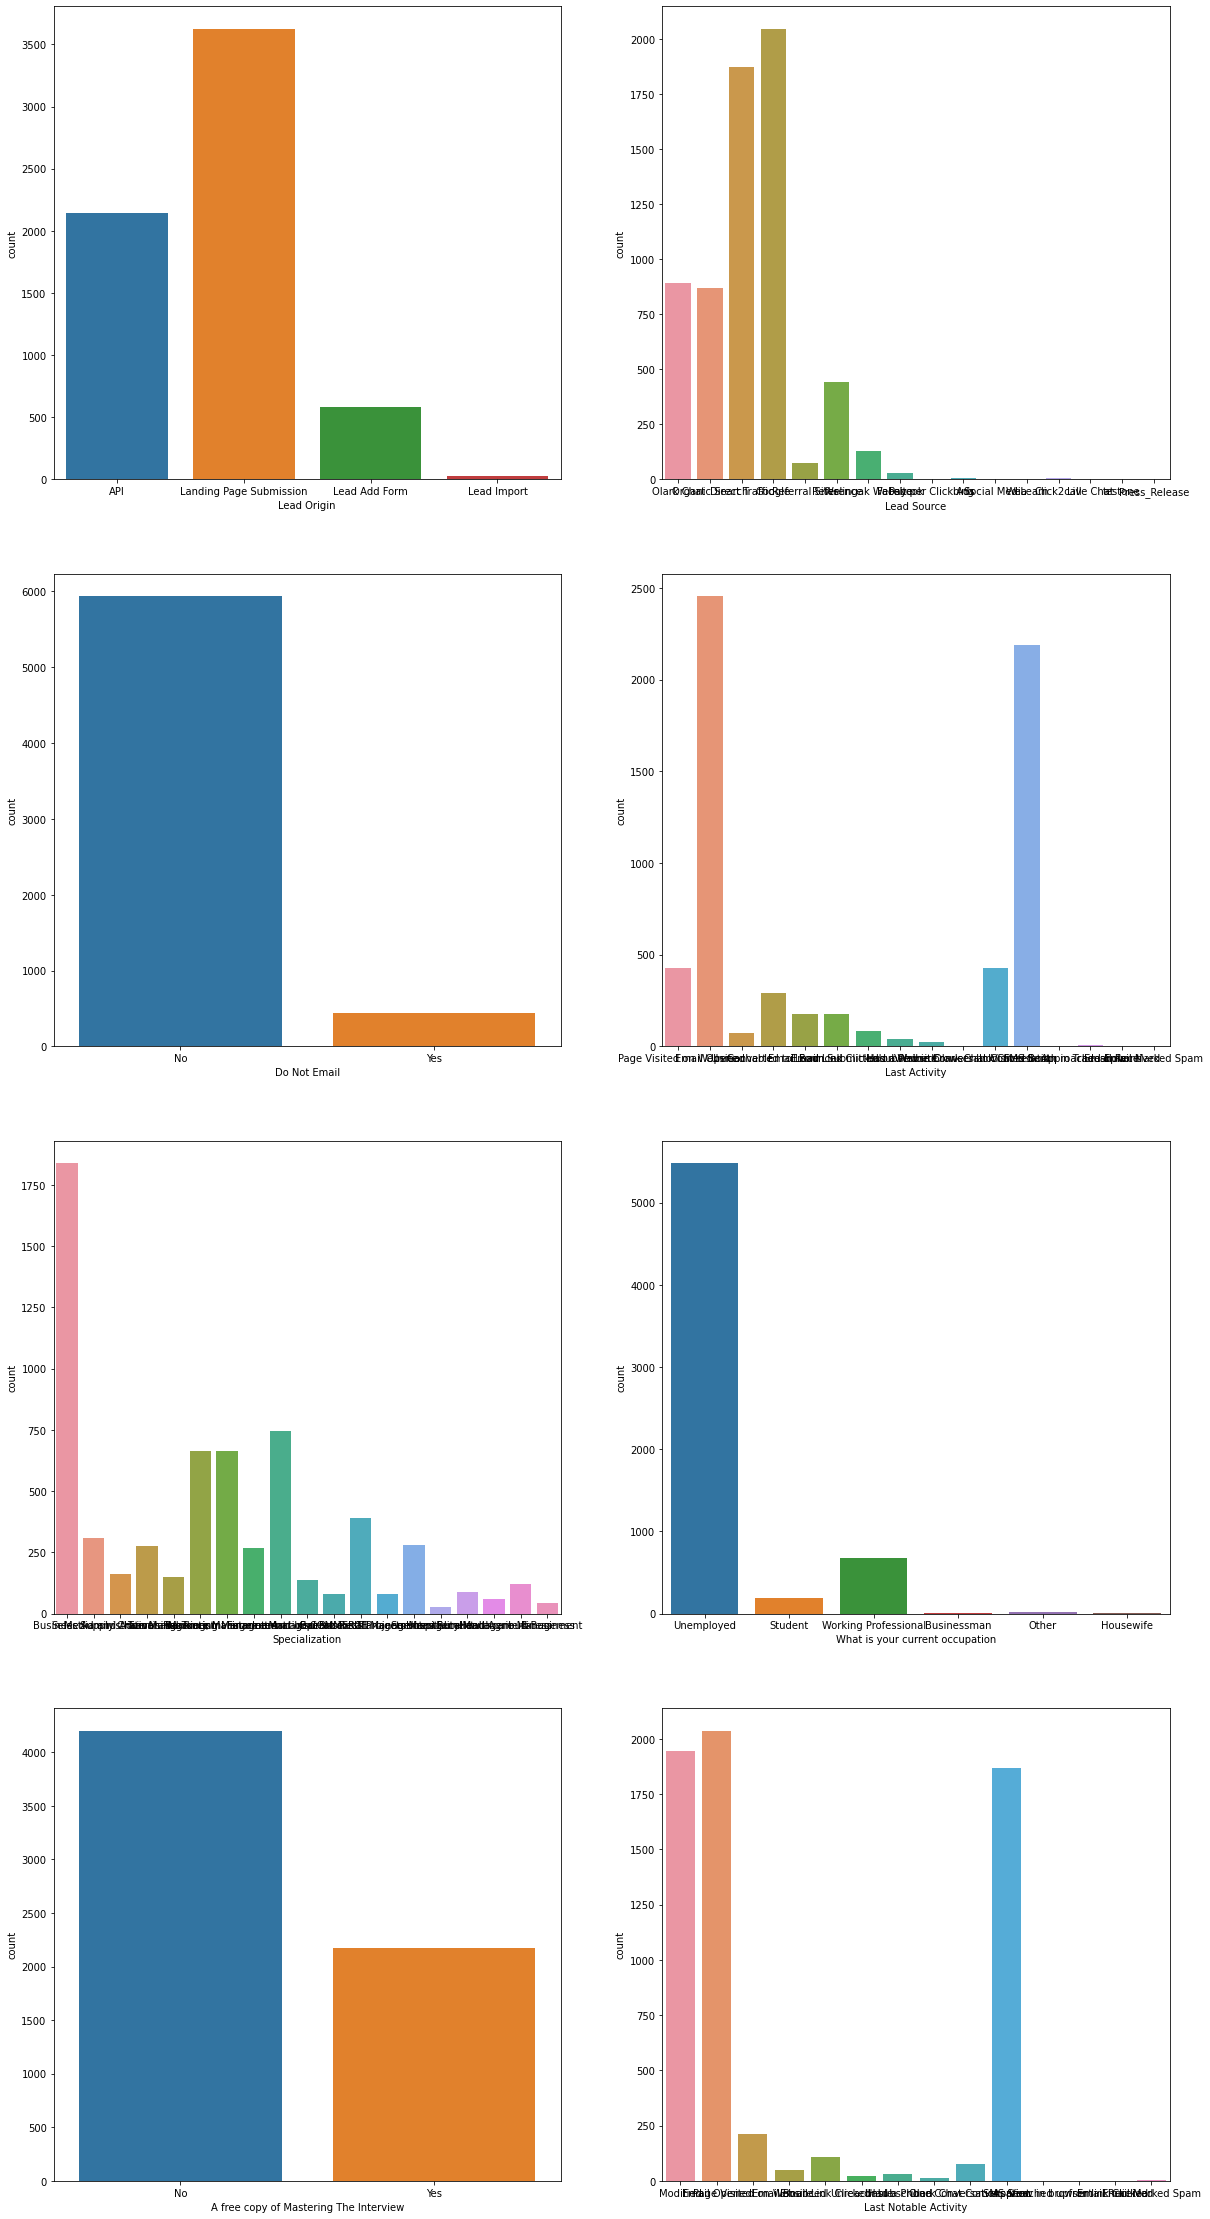

In [22]:
#Visualising categorical variables
n=1
plt.figure(figsize=(20,40))
for i in df.loc[:, df.dtypes == 'object'].columns:
    plt.subplot(4,2,n)
    sns.countplot(df[i])
    n = n+1

# Step5: Creating Dummy Variables

In [23]:
#creating a new df for categorical variables
cat_var = df.loc[:, df.dtypes == 'object'].columns

In [24]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']])

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [25]:
#Also creating a dummy for specialisation
#since we still have select as value we will drop corresponding rows
dummy1 = pd.get_dummies(df[['Specialization']], prefix='Specialization')
dummy1 = dummy1.drop(['Specialization_Select'], 1)
df = pd.concat([df, dummy1], axis = 1)

In [26]:
#dropping all these columns since we created their dummies
df = df.drop(columns=cat_var)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step6: Splitting data into Train-Test 

In [27]:
#Put all feature variables in x and target variables in y
X = df.drop('Converted',1)
y = df['Converted']

In [28]:
# Split the dataset into 70% and 30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE

# Step7: Model Building

In [30]:
#Set up LR object
LR = LogisticRegression()

In [31]:
#selecting 15 features
rfe = RFE(LR,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [32]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_API', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Source_Click2call', False, 11),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Social Media', False, 66),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 44),
 ('Do Not Email_No', False, 9),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_A

In [33]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [34]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [35]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.8
Date:                Tue, 07 Dec 2021   Deviance:                       4137.6
Time:                        15:56:55   Pearson chi2:                 4.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8365      0.597     -1.402      0.161      -2.006       0.333
TotalVisits                                             12.1190      2.739      4.425      0.000       6.751      17.487
Total Time Spent on Website                              4.4380      0.185     23.931      0.000       4.075       4.802
Lead Origin_Landing Page Submission                     -0.2917      0.098     -2.987      0.003      -0.483      -0.100
Lead Origin_Lead Add Form                                4.0120      0.266     15.057      0.000       3.490       4.534
Lead Source_Olark Chat                                   1.2617      0.138      9.146      0.000       0.991       1.532
Lead Source_Welingak Website                             2.1533      1.037      2.077      0.038       0.121       4.185
Do Not Email_Yes                                        -1.4817      0.195     -7.618      0.000      -1.863      -1.100
Last Activity_Had a Phone Conversation                   0.9597      0.981      0.978      0.328      -0.964       2.883
Last Activity_SMS Sent                                   1.1965      0.083     14.473      0.000       1.034       1.359
What is your current occupation_Housewife               22.7379   2.43e+04      0.001      0.999   -4.76e+04    4.77e+04
What is your current occupation_Student                 -1.1186      0.625     -1.790      0.073      -2.343       0.106
What is your current occupation_Unemployed              -1.3197      0.588     -2.243      0.025      -2.473      -0.167
What is your current occupation_Working Professional     1.3069      0.618      2.116      0.034       0.096       2.517
Last Notable Activity_Had a Phone Conversation          23.2927   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.7780      0.807      3.443      0.001       1.197       4.359
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [36]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.37
2,Lead Origin_Landing Page Submission,3.80
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.60


VIF values are right in range now but there is discrepency in p values. Dropping 'Last Notable Activity had a phone conversation'

## Model 2

In [37]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [38]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Tue, 07 Dec 2021   Deviance:                       4143.6
Time:                        15:56:56   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8406      0.597     -1.409      0.159      -2.010       0.329
TotalVisits                                             12.2205      2.741      4.458      0.000       6.847      17.594
Total Time Spent on Website                              4.4302      0.185     23.907      0.000       4.067       4.793
Lead Origin_Landing Page Submission                     -0.2868      0.098     -2.939      0.003      -0.478      -0.096
Lead Origin_Lead Add Form                                4.0150      0.266     15.069      0.000       3.493       4.537
Lead Source_Olark Chat                                   1.2647      0.138      9.167      0.000       0.994       1.535
Lead Source_Welingak Website                             2.1533      1.037      2.077      0.038       0.121       4.185
Do Not Email_Yes                                        -1.4821      0.194     -7.622      0.000      -1.863      -1.101
Last Activity_Had a Phone Conversation                   2.7406      0.803      3.412      0.001       1.166       4.315
Last Activity_SMS Sent                                   1.1961      0.083     14.473      0.000       1.034       1.358
What is your current occupation_Housewife               21.7378   1.47e+04      0.001      0.999   -2.89e+04    2.89e+04
What is your current occupation_Student                 -1.1175      0.625     -1.788      0.074      -2.342       0.107
What is your current occupation_Unemployed              -1.3184      0.588     -2.241      0.025      -2.471      -0.165
What is your current occupation_Working Professional     1.3054      0.618      2.114      0.035       0.095       2.516
Last Notable Activity_Unreachable                        2.7771      0.807      3.442      0.001       1.196       4.358
========================================================================================================================
"""

In [39]:
# Repeating the same process
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,What is your current occupation_Unemployed,6.37
2,Lead Origin_Landing Page Submission,3.80
1,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
12,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.60
5,Lead Source_Welingak Website,1.33
10,What is your current occupation_Student,1.20


The p values are still not upto the mark. We will now drop 'Last Activity_Had a Phone Conversation'

## Model3

In [40]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [41]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.2
Date:                Tue, 07 Dec 2021   Deviance:                       4160.4
Time:                        15:56:56   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8482      0.596     -1.423      0.155      -2.017       0.320
TotalVisits                                             12.6990      2.764      4.595      0.000       7.282      18.116
Total Time Spent on Website                              4.4162      0.185     23.904      0.000       4.054       4.778
Lead Origin_Landing Page Submission                     -0.2887      0.097     -2.967      0.003      -0.479      -0.098
Lead Origin_Lead Add Form                                4.0055      0.266     15.038      0.000       3.483       4.527
Lead Source_Olark Chat                                   1.2547      0.138      9.109      0.000       0.985       1.525
Lead Source_Welingak Website                             2.1553      1.037      2.079      0.038       0.123       4.187
Do Not Email_Yes                                        -1.4920      0.194     -7.678      0.000      -1.873      -1.111
Last Activity_SMS Sent                                   1.1808      0.082     14.321      0.000       1.019       1.342
What is your current occupation_Housewife               21.7448   1.48e+04      0.001      0.999   -2.89e+04    2.89e+04
What is your current occupation_Student                 -1.1055      0.624     -1.771      0.077      -2.329       0.118
What is your current occupation_Unemployed              -1.2954      0.588     -2.204      0.028      -2.447      -0.143
What is your current occupation_Working Professional     1.3274      0.617      2.151      0.031       0.118       2.537
Last Notable Activity_Unreachable                        2.7583      0.807      3.420      0.001       1.177       4.339
========================================================================================================================
"""

In [42]:
# Repeating the same process
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.36
2,Lead Origin_Landing Page Submission,3.80
1,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,2.03
4,Lead Source_Olark Chat,1.90
11,What is your current occupation_Working Profes...,1.90
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.33
9,What is your current occupation_Student,1.20


## Model 4

In [43]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [44]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.6
Date:                Tue, 07 Dec 2021   Deviance:                       4165.2
Time:                        15:56:56   Pearson chi2:                 4.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2779      0.554     -0.501      0.616      -1.364       0.809
TotalVisits                                             12.4674      2.748      4.536      0.000       7.080      17.854
Total Time Spent on Website                              4.4135      0.185     23.901      0.000       4.052       4.775
Lead Origin_Landing Page Submission                     -0.2836      0.097     -2.917      0.004      -0.474      -0.093
Lead Origin_Lead Add Form                                4.0057      0.266     15.044      0.000       3.484       4.528
Lead Source_Olark Chat                                   1.2524      0.138      9.096      0.000       0.983       1.522
Lead Source_Welingak Website                             2.1539      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.4953      0.195     -7.687      0.000      -1.877      -1.114
Last Activity_SMS Sent                                   1.1802      0.082     14.317      0.000       1.019       1.342
What is your current occupation_Student                 -1.6742      0.586     -2.859      0.004      -2.822      -0.527
What is your current occupation_Unemployed              -1.8636      0.547     -3.409      0.001      -2.935      -0.792
What is your current occupation_Working Professional     0.7586      0.578      1.313      0.189      -0.374       1.891
Last Notable Activity_Unreachable                        2.7556      0.807      3.415      0.001       1.174       4.337
========================================================================================================================
"""

In [45]:
# Repeating the same process
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,6.30
2,Lead Origin_Landing Page Submission,3.77
1,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,2.01
4,Lead Source_Olark Chat,1.89
10,What is your current occupation_Working Profes...,1.89
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.33
8,What is your current occupation_Student,1.19


## Model 5

In [46]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [47]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.6
Date:                Tue, 07 Dec 2021   Deviance:                       4173.2
Time:                        15:56:57   Pearson chi2:                 5.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2838      0.555     -0.511      0.609      -1.372       0.804
TotalVisits                                             12.4687      2.750      4.535      0.000       7.080      17.858
Total Time Spent on Website                              4.4134      0.185     23.899      0.000       4.051       4.775
Lead Origin_Landing Page Submission                     -0.2840      0.097     -2.921      0.003      -0.475      -0.093
Lead Origin_Lead Add Form                                4.3273      0.258     16.804      0.000       3.823       4.832
Lead Source_Olark Chat                                   1.2525      0.138      9.096      0.000       0.983       1.522
Do Not Email_Yes                                        -1.4844      0.193     -7.684      0.000      -1.863      -1.106
Last Activity_SMS Sent                                   1.1840      0.082     14.375      0.000       1.023       1.345
What is your current occupation_Student                 -1.6766      0.587     -2.858      0.004      -2.826      -0.527
What is your current occupation_Unemployed              -1.8586      0.547     -3.395      0.001      -2.932      -0.786
What is your current occupation_Working Professional     0.7558      0.579      1.306      0.192      -0.378       1.890
Last Notable Activity_Unreachable                        2.7549      0.807      3.413      0.001       1.173       4.337
========================================================================================================================
"""

In [48]:
# Repeating the same process
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,6.30
2,Lead Origin_Landing Page Submission,3.77
1,Total Time Spent on Website,2.37
4,Lead Source_Olark Chat,1.89
9,What is your current occupation_Working Profes...,1.86
3,Lead Origin_Lead Add Form,1.68
0,TotalVisits,1.63
6,Last Activity_SMS Sent,1.59
7,What is your current occupation_Student,1.19
5,Do Not Email_Yes,1.09


In [49]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [50]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.4
Date:                Tue, 07 Dec 2021   Deviance:                       4174.8
Time:                        15:56:57   Pearson chi2:                 5.00e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.4010      0.206      1.942      0.052      -0.004       0.806
TotalVisits                                   12.3466      2.743      4.501      0.000       6.970      17.723
Total Time Spent on Website                    4.4136      0.185     23.899      0.000       4.052       4.776
Lead Origin_Landing Page Submission           -0.2829      0.097     -2.910      0.004      -0.473      -0.092
Lead Origin_Lead Add Form                      4.3267      0.257     16.804      0.000       3.822       4.831
Lead Source_Olark Chat                         1.2525      0.138      9.099      0.000       0.983       1.522
Do Not Email_Yes                              -1.4820      0.193     -7.675      0.000      -1.861      -1.104
Last Activity_SMS Sent                         1.1873      0.082     14.434      0.000       1.026       1.349
What is your current occupation_Student       -2.3611      0.282     -8.387      0.000      -2.913      -1.809
What is your current occupation_Unemployed    -2.5435      0.186    -13.698      0.000      -2.907      -2.180
Last Notable Activity_Unreachable              2.7564      0.807      3.415      0.001       1.174       4.338
==============================================================================================================
"""

In [51]:
# Repeating the same process
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,3.99
2,Lead Origin_Landing Page Submission,3.10
1,Total Time Spent on Website,2.07
0,TotalVisits,1.58
4,Lead Source_Olark Chat,1.55
6,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.30
7,What is your current occupation_Student,1.11
5,Do Not Email_Yes,1.09
9,Last Notable Activity_Unreachable,1.01


Now all the p values are below 0.05

# Step7: Model Evaluation

In [52]:
y_train_pred=res.predict(sm.add_constant(X_train))

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred})

y_train_pred_final.head()   # viewing first 5 rows


,Converted,Converted_probability
8003,0,0.286754
218,0,0.134074
4171,1,0.121449
4037,1,0.291114
3660,1,0.966802


In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28675421, 0.13407354, 0.12144914, 0.29111443, 0.96680187,
       0.23127789, 0.21024906, 0.95886967, 0.07187284, 0.8988193 ])

In [54]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted
8003,0,0.286754,0
218,0,0.134074,0
4171,1,0.121449,0
4037,1,0.291114,0
3660,1,0.966802,1


In [55]:
# Now printing the confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1922,  390],
       [ 564, 1585]], dtype=int64)

In [56]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7861466039004708

In [57]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [58]:
# Calculate the sensitivity
TP/(TP+FN)

0.7375523499302001

In [59]:
# Calculate the specificity
TN/(TN+FP)

0.8313148788927336

With the current cut off as 0.5 we have around 78% accuracy, sensitivity of around 75% and specificity of around 83%

# Step8: ROC Curve Plotting

1. ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
2. The curve closer to the left side border then right side of the border is more accurate.
3. The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [60]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    # Creating roc curve values like false positive rate , true positive rate and threshold

    FP, TP, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( FP, TP, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return


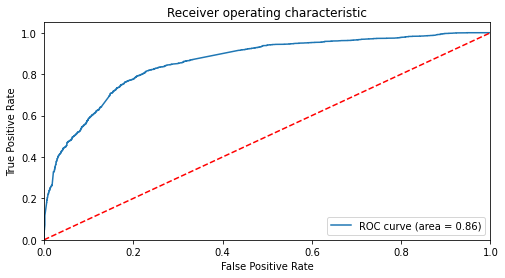

In [61]:
edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above roc curve -

1. The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
2. The area under the curve is 88% of the total area.

In [62]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows


,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.286754,0,1,1,1,0,0,0,0,0,0,0
218,0,0.134074,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.121449,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.291114,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.966802,1,1,1,1,1,1,1,1,1,1,1


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding 'Accuracy', 'Sensitivity' and 'Specificity' for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [63]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.481731    1.000000     0.000000
0.1          0.1  0.532840    0.995347     0.102941
0.2          0.2  0.698050    0.944160     0.469291
0.3          0.3  0.768213    0.865054     0.678201
0.4          0.4  0.789957    0.806887     0.774221
0.5          0.5  0.786147    0.737552     0.831315
0.6          0.6  0.757229    0.622615     0.882353
0.7          0.7  0.737279    0.545370     0.915657
0.8          0.8  0.710155    0.451373     0.950692
0.9          0.9  0.637077    0.265705     0.982266


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is probability cutoff = 0.4 because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.


Let's plot this data and see the convergent point or meeting point for all three point 'accuracy' , 'sensitivity' and 'specificity'



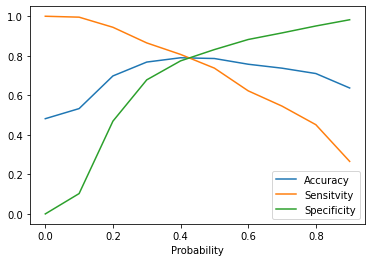

In [64]:
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

We can clearly set 0.42 as cutoff

In [65]:
#Creating a predicted column
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
8003,0,0.286754,0,1,1,1,0,0,0,0,0,0,0,0
218,0,0.134074,0,1,1,0,0,0,0,0,0,0,0,0
4171,1,0.121449,0,1,1,0,0,0,0,0,0,0,0,0
4037,1,0.291114,0,1,1,1,0,0,0,0,0,0,0,0
3660,1,0.966802,1,1,1,1,1,1,1,1,1,1,1,1


# Step9: Precision and Recall

Let's create precision and recall using confusion matrix for the final dataset ass we know that to attain more stability and predict successfully in our model one needs to check these two important methods which not only will tell us how our model is but also it will show us some insight like what is the score for result relevancy and how many truly relevant results are returned.

In [66]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[1922,  390],
       [ 564, 1585]], dtype=int64)

In [67]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.8025316455696202
Recall 0.7375523499302001


# Step10: Precision and Recall Tradeoff

In [68]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(8003    0
 218     0
 4171    1
 4037    1
 3660    1
        ..
 8759    1
 100     0
 5877    0
 8658    0
 8217    0
 Name: Converted, Length: 4461, dtype: int64,
 8003    0
 218     0
 4171    0
 4037    0
 3660    1
        ..
 8759    1
 100     1
 5877    1
 8658    0
 8217    0
 Name: Predicted, Length: 4461, dtype: int64)

In [69]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

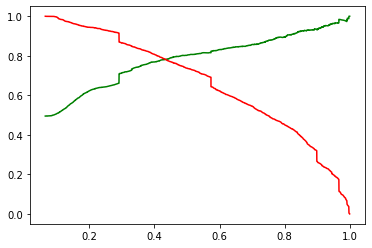

In [70]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
8003,0,0.286754,0,1,1,1,0,0,0,0,0,0,0,0
218,0,0.134074,0,1,1,0,0,0,0,0,0,0,0,0
4171,1,0.121449,0,1,1,0,0,0,0,0,0,0,0,0
4037,1,0.291114,0,1,1,1,0,0,0,0,0,0,0,0
3660,1,0.966802,1,1,1,1,1,1,1,1,1,1,1,1


In [72]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7886124187401928

In [73]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1850,  462],
       [ 481, 1668]], dtype=int64)

In [74]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [75]:
# Calculate Precision

TP/(TP+FP)

0.7830985915492957

In [76]:
# Calculate Recall

TP/(TP+FN)

0.7761749651000466

The cutoff point seems to be good now

# Step11: Prediction on test set

In [77]:
# Taking the same column train set has
test_cols=X_train.columns[1:]              

In [78]:
test_cols = list(test_cols)
test_cols.append('Specialization_IT Projects Management')
#test_cols.append('Specialization_International Business')

In [79]:
# Updating it in the final test set
X_test_final=X_test[test_cols]               

In [80]:
 # Adding constant to the final set set
X_test_final=sm.add_constant(X_test_final) 

In [81]:
# Predicting the final test set
y_pred_test=res.predict(X_test_final)       

In [82]:
y_pred_test[:10]

4771    0.203592
6122    1.000000
9202    1.000000
6570    1.000000
2668    1.000000
4233    0.988993
3368    1.000000
9091    1.000000
5972    1.000000
3631    1.000000
dtype: float64

In [83]:
# Converting y_pred and y_test to a dataframe

y_pred_1 = pd.DataFrame(y_pred_test)
y_test_df = pd.DataFrame(y_test)

In [84]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [85]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [86]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.203592
1,0,1.000000
2,0,1.000000
3,1,1.000000
4,1,1.000000


In [87]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [88]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [89]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.203592,0
1,0,1.000000,1
2,0,1.000000,1
3,1,1.000000,1
4,1,1.000000,1


In [90]:
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    804
0    112
Name: final_predicted, dtype: int64

In [91]:
# check the precentage of final_predicted conversions on test data

815/float(797+218)

0.8029556650246306

### Conclusion
- Hence we can see that the final prediction of conversions have a target rate of 81% (80.5%)

### Valuable Insights -

- The Accuracy, Precision and Recall score we got from test set in aceptable range.
- We have high recall score than precision score which we were exactly looking for.
- In business terms, this model has an ability to adjust with the company’s requirements in coming future.
- This concludes that the model is in stable state.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    1. Last Notable Activity_Had a Phone Conversation
    2. Lead Origin_Lead Add Form and
    3. What is your current occupation_Working Professional